# FIT5196 Assessment 3

Date: 18/06/2018

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment here, e.g.,:
* pandas 
* re 
* numpy 
* csv
* datetime
* re
* math
* matplotlib
* nltk


## Import libraries 

In [1]:
# Code to import libraries in this assessment

import numpy as np
import pandas as pd
import datetime
import re
import csv
import math
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from IPython.display import display


# PART A

## Loading dataset1_with_error.csv File
Loading and doing exploratory analysis on the input file before auditing & cleansing

In [2]:
# load the dataset with error into a dataframe
csv_data1 = pd.read_csv('dataset1_with_error.csv')
display(csv_data1.head(5))

,Id,Title,Location,ContractType,ContractTime,Company,Category,Salary per annum,SourceName,OpenDate,CloseDate
0,12612628,Engineering Systems Analyst,Dorking,not available,permanent,Gregory Martin International,Engineering Jobs,24996,cv-library.co.uk,20121103T000000,20121203T000000
1,12612830,Stress Engineer Glasgow,Glasgow,not available,permanent,Gregory Martin International,Engineering Jobs,30000,cv-library.co.uk,20130108T150000,20130408T150000
2,12612844,Modelling and simulation analyst,Hampshire,not available,permanent,Gregory Martin International,Engineering Jobs,30000,cv-library.co.uk,20130726T150000,20130924T150000
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Surrey,not available,permanent,Gregory Martin International,Engineering Jobs,27504,cv-library.co.uk,20121214T000000,20130314T000000
4,12613647,"Pioneer, Miser Engineering Systems Analyst",Surrey,not available,permanent,Gregory Martin International,Engineering Jobs,24996,cv-library.co.uk,20131025T000000,20131224T000000


In [3]:
display(csv_data1.tail(5))

,Id,Title,Location,ContractType,ContractTime,Company,Category,Salary per annum,SourceName,OpenDate,CloseDate
25072,69245044,Mobile Developer (iOS or Android),London,full_time,permanent,Harvey Nash,IT Jobs,39996,jobs.newstatesman.com,20130714T000000,20130912T000000
25073,69247270,Tax Assistant Manager,Liverpool,not available,permanent,NaN,Accounting & Finance Jobs,32004,michaelpage.co.uk,20120711T120000,20121009T120000
25074,69247637,Newly Qualified Assistant Manager Role,London,full_time,permanent,Pro Tax,Accounting & Finance Jobs,42996,icaewjobs.com,20130618T120000,20130817T120000
25075,69247646,Corporate Tax Senior Manager Leeds,Leeds,full_time,permanent,Pro Tax,Accounting & Finance Jobs,67500,icaewjobs.com,20120823T000000,20121022T000000
25076,69247667,Professional Services Financial Accountant,London,full_time,permanent,Pro Finance,Accounting & Finance Jobs,38496,icaewjobs.com,20120209T150000,20120509T150000


In [4]:
csv_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25077 entries, 0 to 25076
Data columns (total 11 columns):
Id                  25077 non-null int64
Title               25077 non-null object
Location            25077 non-null object
ContractType        25077 non-null object
ContractTime        25077 non-null object
Company             21242 non-null object
Category            25077 non-null object
Salary per annum    25077 non-null object
SourceName          25077 non-null object
OpenDate            25077 non-null object
CloseDate           25077 non-null object
dtypes: int64(1), object(10)
memory usage: 2.1+ MB


In [5]:
csv_data1.describe()

,Id
count,2.507700e+04
mean,6.664312e+07
std,5.195261e+06
min,1.261263e+07
25%,6.720830e+07
50%,6.836110e+07
75%,6.871371e+07
max,6.924767e+07


## Data Cleanup
PART A has only focused on cleaning the title, which has majority of inconsistent, dirty data. 
Rest of the cleanup is done while or before the integration task in PARTB

In [6]:
# Defining the regular expressions to be checked in the job titles
clean_regex_list = [
    re.compile(r'year\s\*+\s(.+)', flags=re.IGNORECASE), # special case 1
    re.compile(r'\**(.+)'),  # discard * from the beginning
    re.compile(r'(.+?)\s\s.+'),  # discard all after \s\s
    re.compile(
        r'(.+?)(?:ndash; |up to |upto |needed |for |needed for |required |required for |required at |:|-)(?:.+)?',
        flags=re.IGNORECASE,
    ),  # discard all after these keywords
    re.compile(r'^([^\*]+)\s?(?:\**)?$'),  # remove * from the end
    re.compile(r'([^\*]+)\s?(?:\**)\s?(?:ph|p/h|per hour|per annum|/hour|\| )?', flags=re.IGNORECASE),  # remove pattern ****ph ****p/h etc
    re.compile(r'(.+?)\*+\s?k.*', flags=re.IGNORECASE),  # remove ****k pattern
]

# For future use if we want to include further special cases to be replaced/removed from title
post_process_repl_list = [
    # populate this list with appropriate regex, repl_str tuple.
]

# Declaring dirty texts to be removed from titles, before main cleaning process
pre_process_repl_list = [
    (r'–', '-'),
    (r'required|needed', ''),
]

# Defining function to do pre-process replacements 
def pre_process_replace(title):
    for unwanted_str, repl_str in pre_process_repl_list:
        title = re.sub(unwanted_str, repl_str, title, flags=re.IGNORECASE)

    return title

# Defining function to do post-process replacements, not doing anything at this moment (for future further special cases)
def post_process_replace(title):
    for unwanted_str, repl_str in post_process_repl_list:
        title = re.sub(unwanted_str, repl_str, title, flags=re.IGNORECASE)

    return title.strip()

# Main function to clean titles
def clean_title(title):

    title = pre_process_replace(title)

    for regex in clean_regex_list:
        match = regex.match(title)

        if match:
            title = match.groups()[0]

    return post_process_replace(title)

# Function to write to output file
def clean_csv():
    with open('dataset1_with_error.csv') as _fr:
        reader = csv.reader(_fr)
        with open('dataset1_solution.csv', mode='w') as _fw:
            writer = csv.writer(_fw)
            for row in reader:
                _clean_title = clean_title(row[1])
                row = [row[0]] + [_clean_title] + row[2:]
                writer.writerow(row)


clean_csv()


# Part B - Integrating the Job datasets 

# Defining Function

In [7]:
def compare_value(value1, value2):
    df_val1=pd.DataFrame(value1, columns=['value1'])
    df_val2=pd.DataFrame(value2, columns=['value2'])
    tmp = df_val1.merge(df_val2, right_index=True, left_index=True, how='outer')
    tmp['compare'] = tmp['value1'] == tmp['value2']
    return tmp

# Data Loading 
Loading the two files to be integrated and running exploratory data analysis on them

In [8]:
# read in two data set
df1 = pd.read_csv('dataset1_solution.csv')
df2 = pd.read_csv('dataset2_integration.csv')
#Display two dataframes together to compare
df1.head()


,Id,Title,Location,ContractType,ContractTime,Company,Category,Salary per annum,SourceName,OpenDate,CloseDate
0,12612628,Engineering Systems Analyst,Dorking,not available,permanent,Gregory Martin International,Engineering Jobs,24996,cv-library.co.uk,20121103T000000,20121203T000000
1,12612830,Stress Engineer Glasgow,Glasgow,not available,permanent,Gregory Martin International,Engineering Jobs,30000,cv-library.co.uk,20130108T150000,20130408T150000
2,12612844,Modelling and simulation analyst,Hampshire,not available,permanent,Gregory Martin International,Engineering Jobs,30000,cv-library.co.uk,20130726T150000,20130924T150000
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Surrey,not available,permanent,Gregory Martin International,Engineering Jobs,27504,cv-library.co.uk,20121214T000000,20130314T000000
4,12613647,"Pioneer, Miser Engineering Systems Analyst",Surrey,not available,permanent,Gregory Martin International,Engineering Jobs,24996,cv-library.co.uk,20131025T000000,20131224T000000


In [9]:
df2.head()

,Id,Source Name,Title,location,Contract Type,Contract Time,Company,Category,Salary per month,OpenDate,CloseDate
0,69247680,jobs.guardian.co.uk,Business Development Exec research / insight ...,London,ft,perm.,BOYCE RECRUITMENT,"PR, Advertising & Marketing Jobs",2125,2012-03-01 15:00:00,2012-03-31 15:00:00
1,69247682,icaewjobs.com,Audit Senior London,London,ft,contr.,Pro Finance,Finance & Accounting Jobs,3600,2013-03-14 12:00:00,2013-04-13 12:00:00
2,69247685,jobs.guardian.co.uk,PR & Social Media Account Executive Top Inter...,Central London,ft,perm.,ECOM RECRUITMENT LTD,"PR, Advertising & Marketing Jobs",1917,2012-02-14 12:00:00,2012-03-15 12:00:00
3,69247688,jobs.guardian.co.uk,Content Manager,London,ft,perm.,NAKAMA LONDON,"PR, Advertising & Marketing Jobs",2083,2012-10-21 00:00:00,2012-12-20 00:00:00
4,69247694,jobs.guardian.co.uk,AV PRODUCTION MANAGER,Worcestershire,ft,perm.,LIVE RECRUITMENT,"PR, Advertising & Marketing Jobs",2292,2012-02-22 00:00:00,2012-04-22 00:00:00


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25077 entries, 0 to 25076
Data columns (total 11 columns):
Id                  25077 non-null int64
Title               25076 non-null object
Location            25077 non-null object
ContractType        25077 non-null object
ContractTime        25077 non-null object
Company             21242 non-null object
Category            25077 non-null object
Salary per annum    25077 non-null object
SourceName          25077 non-null object
OpenDate            25077 non-null object
CloseDate           25077 non-null object
dtypes: int64(1), object(10)
memory usage: 2.1+ MB


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25276 entries, 0 to 25275
Data columns (total 11 columns):
Id                  25276 non-null int64
Source Name         25276 non-null object
Title               25276 non-null object
location            25276 non-null object
Contract Type       4819 non-null object
Contract Time       19763 non-null object
Company             24178 non-null object
Category            25276 non-null object
Salary per month    25276 non-null int64
OpenDate            25276 non-null object
CloseDate           25276 non-null object
dtypes: int64(2), object(9)
memory usage: 2.1+ MB


## Resolve schema conflict

In [12]:
compare_value(df1.dtypes, df2.dtypes)

,value1,value2,compare
Category,object,object,True
CloseDate,object,object,True
Company,object,object,True
Contract Time,NaN,object,False
Contract Type,NaN,object,False
ContractTime,object,NaN,False
ContractType,object,NaN,False
Id,int64,int64,True
Location,object,NaN,False
OpenDate,object,object,True


## Standardising the column names

In [13]:
df1.rename(columns = {'ContractType':'Contract Type','ContractTime':'Contract Time', 'SourceName':'Source Name'}, inplace = True)
df1.head(2)

,Id,Title,Location,Contract Type,Contract Time,Company,Category,Salary per annum,Source Name,OpenDate,CloseDate
0,12612628,Engineering Systems Analyst,Dorking,not available,permanent,Gregory Martin International,Engineering Jobs,24996,cv-library.co.uk,20121103T000000,20121203T000000
1,12612830,Stress Engineer Glasgow,Glasgow,not available,permanent,Gregory Martin International,Engineering Jobs,30000,cv-library.co.uk,20130108T150000,20130408T150000


In [14]:
compare_value(df1.dtypes, df2.dtypes)

,value1,value2,compare
Category,object,object,True
CloseDate,object,object,True
Company,object,object,True
Contract Time,object,object,True
Contract Type,object,object,True
Id,int64,int64,True
Location,object,NaN,False
OpenDate,object,object,True
Salary per annum,object,NaN,False
Salary per month,NaN,int64,False


In [15]:
df2.rename(columns = {'location':'Location'}, inplace = True)
df2.head()

,Id,Source Name,Title,Location,Contract Type,Contract Time,Company,Category,Salary per month,OpenDate,CloseDate
0,69247680,jobs.guardian.co.uk,Business Development Exec research / insight ...,London,ft,perm.,BOYCE RECRUITMENT,"PR, Advertising & Marketing Jobs",2125,2012-03-01 15:00:00,2012-03-31 15:00:00
1,69247682,icaewjobs.com,Audit Senior London,London,ft,contr.,Pro Finance,Finance & Accounting Jobs,3600,2013-03-14 12:00:00,2013-04-13 12:00:00
2,69247685,jobs.guardian.co.uk,PR & Social Media Account Executive Top Inter...,Central London,ft,perm.,ECOM RECRUITMENT LTD,"PR, Advertising & Marketing Jobs",1917,2012-02-14 12:00:00,2012-03-15 12:00:00
3,69247688,jobs.guardian.co.uk,Content Manager,London,ft,perm.,NAKAMA LONDON,"PR, Advertising & Marketing Jobs",2083,2012-10-21 00:00:00,2012-12-20 00:00:00
4,69247694,jobs.guardian.co.uk,AV PRODUCTION MANAGER,Worcestershire,ft,perm.,LIVE RECRUITMENT,"PR, Advertising & Marketing Jobs",2292,2012-02-22 00:00:00,2012-04-22 00:00:00


In [16]:
compare_value(df1.dtypes, df2.dtypes)

,value1,value2,compare
Category,object,object,True
CloseDate,object,object,True
Company,object,object,True
Contract Time,object,object,True
Contract Type,object,object,True
Id,int64,int64,True
Location,object,object,True
OpenDate,object,object,True
Salary per annum,object,NaN,False
Salary per month,NaN,int64,False


## Converting salaries to one standard (per annum)

In [17]:
df2.rename(columns = {'Salary per month':'Salary per annum'}, inplace = True)
df2['Salary per annum'] = df2['Salary per annum']*12
df2.head(2)

,Id,Source Name,Title,Location,Contract Type,Contract Time,Company,Category,Salary per annum,OpenDate,CloseDate
0,69247680,jobs.guardian.co.uk,Business Development Exec research / insight ...,London,ft,perm.,BOYCE RECRUITMENT,"PR, Advertising & Marketing Jobs",25500,2012-03-01 15:00:00,2012-03-31 15:00:00
1,69247682,icaewjobs.com,Audit Senior London,London,ft,contr.,Pro Finance,Finance & Accounting Jobs,43200,2013-03-14 12:00:00,2013-04-13 12:00:00


In [18]:
compare_value(df1.dtypes, df2.dtypes)

,value1,value2,compare
Category,object,object,True
CloseDate,object,object,True
Company,object,object,True
Contract Time,object,object,True
Contract Type,object,object,True
Id,int64,int64,True
Location,object,object,True
OpenDate,object,object,True
Salary per annum,object,int64,False
Source Name,object,object,True


## Resolving Data conflicts

### Normalising contract time and type and date columns

In [19]:
for index, row in df2.iterrows():
    clean_contract_type = str(row['Contract Type']).replace('ft','full_time')
    clean_contract_type = clean_contract_type.replace('pt','part_time')
    
    clean_contract_time = str(row['Contract Time']).replace('perm.','permanent')
    clean_contract_time = clean_contract_time.replace('contr.','contract')
    
    df2.loc[index, 'OpenDate'] = datetime.datetime.strptime(df2.loc[index, 'OpenDate'], '%Y-%m-%d %H:%M:%S').strftime('%Y%m%dT%H%M%S')
    df2.loc[index, 'CloseDate'] = datetime.datetime.strptime(df2.loc[index, 'CloseDate'], '%Y-%m-%d %H:%M:%S').strftime('%Y%m%dT%H%M%S')
    
    df2.loc[index, 'Contract Type'] = clean_contract_type
    df2.loc[index, 'Contract Time'] = clean_contract_time

### Cleaning up salary column by removing inconsistencies
In dataset1, the salary was listed with dirty text like K, which had to be replaced by 000
In order to be consistent with dataset2
We also took care of range salaries (XXK-YYK), by taking the mean value of XX andYY

In [20]:
def DoAverageSalary(cleaned_up_salary): 
    salary_range = cleaned_up_salary.split("-") 
    #salary_range = string.split(cleaned_up_salary, '-')
    num_sal = []
    for salary in salary_range:
        num_sal.append(float(salary))

    return(sum(num_sal)/len(num_sal))

In [21]:
for index, row in df1.iterrows():
    cleaned_up_salary = str(row['Salary per annum']).replace('K','000')
    cleaned_up_salary = cleaned_up_salary.replace('k','000')
    df1.loc[index, 'Salary per annum'] = DoAverageSalary(cleaned_up_salary)

In [22]:
df1.tail()

,Id,Title,Location,Contract Type,Contract Time,Company,Category,Salary per annum,Source Name,OpenDate,CloseDate
25072,69245044,Mobile Developer (iOS or Android),London,full_time,permanent,Harvey Nash,IT Jobs,39996,jobs.newstatesman.com,20130714T000000,20130912T000000
25073,69247270,Tax Assistant Manager,Liverpool,not available,permanent,NaN,Accounting & Finance Jobs,32004,michaelpage.co.uk,20120711T120000,20121009T120000
25074,69247637,Newly Qualified Assistant Manager Role,London,full_time,permanent,Pro Tax,Accounting & Finance Jobs,42996,icaewjobs.com,20130618T120000,20130817T120000
25075,69247646,Corporate Tax Senior Manager,Leeds,full_time,permanent,Pro Tax,Accounting & Finance Jobs,67500,icaewjobs.com,20120823T000000,20121022T000000
25076,69247667,Professional Services Financial Accountant,London,full_time,permanent,Pro Finance,Accounting & Finance Jobs,38496,icaewjobs.com,20120209T150000,20120509T150000


In [23]:
df2 = df2[['Id', 'Title','Location','Contract Type','Contract Time','Company','Category','Salary per annum','Source Name','OpenDate','CloseDate']]
df2.tail()

,Id,Title,Location,Contract Type,Contract Time,Company,Category,Salary per annum,Source Name,OpenDate,CloseDate
25271,72702956,Pharmaceutical Analytical Chemist Jobs in Nor...,Northern Ireland,nan,permanent,Flame Pharma,Healthcare & Nursing Jobs,23004,emedcareers.com,20130924T150000,20131024T150000
25272,72702963,Medical Sales Representative South East Essex,UK,nan,contract,The Vacancy Management Company,Healthcare & Nursing Jobs,22500,emedcareers.com,20120521T120000,20120620T120000
25273,72703193,SENIOR PROJECT MANAGER EVENT & EXHIBITION AGENCY,Hertfordshire,full_time,permanent,Live Recruitment,"PR, Advertising & Marketing Jobs",32496,eventjobsearch.co.uk,20131117T150000,20131217T150000
25274,72705197,Curriculum Leader Mathematics,Wrexham,nan,permanent,NaN,Teaching Jobs,5004,hays.co.uk,20120115T120000,20120315T120000
25275,72705203,TEACHER OF BUSINESS STUDIES AND LAW,Salisbury,nan,contract,NaN,Teaching Jobs,22800,hays.co.uk,20130427T150000,20130511T150000


In [24]:
compare_value(df1.dtypes, df2.dtypes)

,value1,value2,compare
Id,int64,int64,True
Title,object,object,True
Location,object,object,True
Contract Type,object,object,True
Contract Time,object,object,True
Company,object,object,True
Category,object,object,True
Salary per annum,int64,int64,True
Source Name,object,object,True
OpenDate,object,object,True


## Data Integration
Now that the datasets are fully consistent, let's integrate them

In [25]:
df = pd.concat([df1,df2])
df.tail()

,Id,Title,Location,Contract Type,Contract Time,Company,Category,Salary per annum,Source Name,OpenDate,CloseDate
25271,72702956,Pharmaceutical Analytical Chemist Jobs in Nor...,Northern Ireland,nan,permanent,Flame Pharma,Healthcare & Nursing Jobs,23004,emedcareers.com,20130924T150000,20131024T150000
25272,72702963,Medical Sales Representative South East Essex,UK,nan,contract,The Vacancy Management Company,Healthcare & Nursing Jobs,22500,emedcareers.com,20120521T120000,20120620T120000
25273,72703193,SENIOR PROJECT MANAGER EVENT & EXHIBITION AGENCY,Hertfordshire,full_time,permanent,Live Recruitment,"PR, Advertising & Marketing Jobs",32496,eventjobsearch.co.uk,20131117T150000,20131217T150000
25274,72705197,Curriculum Leader Mathematics,Wrexham,nan,permanent,NaN,Teaching Jobs,5004,hays.co.uk,20120115T120000,20120315T120000
25275,72705203,TEACHER OF BUSINESS STUDIES AND LAW,Salisbury,nan,contract,NaN,Teaching Jobs,22800,hays.co.uk,20130427T150000,20130511T150000


In [26]:
# Checking Id duplication after the concatenation in order to establish Id as the Global Key for the integrated dataframe
df.groupby('Id')['Id'].count()[df.groupby('Id')['Id'].count()>1]

Series([], Name: Id, dtype: int64)

In [27]:
#Now that we have cleand up all missing values, let's put them in to solution CSV
df.to_csv('dataset1_dataset2_solution.csv', index=False)

# Part C: Finding missing value and fill in the reasonable values

In [28]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y%m%dT%H%M%S')
df3 = pd.read_csv('dataset3_with_missing.csv', parse_dates=['date'], date_parser=dateparse)
# When pandas is able to read the CSV with these date parsers, it means the date column has the right dateformat
# So, we can conclude that date column has no missing value, if we are able to read the CSV file correctly with these params
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,1999700045,2014-05-02,313000,3,1.50,1340.0,7912,1.5,0,0,3,7,1340.0,0.0,1955,0,98133,47.7658,-122.339
1,1860600135,2014-05-02,2384000,5,2.50,3650.0,9050,2.0,0,4,5,10,3370.0,280.0,1921,0,98119,47.6345,-122.367
2,5467900070,2014-05-02,342000,3,2.00,1930.0,11947,1.0,0,0,4,8,1930.0,0.0,1966,0,98042,47.3672,-122.151
3,4040800810,2014-05-02,420000,3,2.25,2000.0,8030,1.0,0,0,4,8,1000.0,1000.0,1963,0,98008,47.6188,-122.114
4,7197300105,2014-05-02,550000,4,2.50,1940.0,10500,1.0,0,0,4,7,1140.0,800.0,1976,0,98052,47.6830,-122.114


In [29]:
# Since the data loaded correctly, we can already confirm date column has no missing values
# Let's now print the shape of the data frame to check it's rows and column numbers
df3.shape

(9967, 19)

In [30]:
# Now that we know there are 19 columns, let's also check their data types
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9967 entries, 0 to 9966
Data columns (total 19 columns):
id               9967 non-null int64
date             9967 non-null datetime64[ns]
price            9967 non-null int64
bedrooms         9967 non-null int64
bathrooms        9567 non-null float64
sqft_living      9901 non-null float64
sqft_lot         9967 non-null int64
floors           9967 non-null float64
waterfront       9967 non-null int64
view             9967 non-null int64
condition        9967 non-null int64
grade            9967 non-null int64
sqft_above       9900 non-null float64
sqft_basement    9900 non-null float64
yr_built         9967 non-null int64
yr_renovated     9967 non-null int64
zipcode          9967 non-null int64
lat              9967 non-null float64
long             9967 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(11)
memory usage: 1.4 MB


In [31]:
#Next up, we are going to check each of the 19 columns (except date as it's already checked) to look for missing values

#First, we identify if any of the ID data are empty, NoN or zero
#if any of the value is empty or NaN, matching the value against itself would result in a false output 
if len(df3.loc[(df3.id == 0) | (df3.id != df3.id)]) == 0:
    print("Column 'id' has no missing value")

Column 'id' has no missing value


In [32]:
#Since we have already checked for missing or wrong data in date column, let's move onto the next column, which is price
#We use the same method as we did for column id, except we also check for negative values for price
if len(df3.loc[(df3.price <= 0) | (df3.price != df3.price)]) == 0:
    print("Column 'price' has no missing value")

Column 'price' has no missing value


In [33]:
#Next we check the bedrooms column, using the same method as we used for id
#First we create a dataframe to store the missing value rows and use the same validator as before 
missing_bedrooms = df3.loc[(df3.bedrooms == 0) | (df3.bedrooms != df3.bedrooms)]
print("Column 'bedrooms' has "+str(len(missing_bedrooms))+" missing values")

Column 'bedrooms' has 3 missing values


In [34]:
#So, there are 3 rows, which are missing # of bedrooms

# Just ensuring we don't unnecessarily run the imputation, in case there are no missing rows 
if (len(missing_bedrooms)>0):
    #In order to estimate the # of bedrooms in these empty rows, we shall find out the estimated living area per bedroom
    #The easiest way to do this is to sum up the total living area and number of bedrooms
    TotalArea = df3['sqft_living'].sum()
    TotalBedrooms = df3['bedrooms'].sum()
    # And then dividing them to find out the average living area for each bedroom
    AvgAreaPerBedroom = TotalArea/TotalBedrooms
    
    for index, row in missing_bedrooms.iterrows():
        estimated_bedrooms = round(missing_bedrooms.loc[index, 'sqft_living']/AvgAreaPerBedroom,0)
        # in case some estiamtes still comes up as zero, we change that to the minimum, i.e 1
        # For example, if living area is zero or missing, this might result in zero bedroom
        if (estimated_bedrooms == 0):
            estimated_bedrooms = 1
        #Finally, we poopulate the missing cells with appropriate estimation of bedrooms 
        df3.loc[index, 'bedrooms'] = estimated_bedrooms

In [35]:
#Let's now check if we have been able to eliminate all the missing value
print("Column 'bedrooms' has "+str(len(df3.loc[(df3.bedrooms == 0) | (df3.bedrooms != df3.bedrooms)]))+" missing values")

Column 'bedrooms' has 0 missing values


In [36]:
#Next we check the bathrooms column, using the same method as we used for id
#First we create a dataframe to store the missing value rows and use the same validator as before
missing_bathrooms = df3.loc[(df3.bathrooms == 0) | (df3.bathrooms != df3.bathrooms)]
print("Column 'bathrooms' has "+str(len(missing_bathrooms))+" missing values")

Column 'bathrooms' has 402 missing values


In [37]:
# Before we do imputation, we are defining the formula for setting the right #of bathrooms in case of fraction estimates
# As bathrooms can be only in multiples of 0.25, 0.5, 0.75 or 1, we first separate the fraction and then using
# a simple if-else, return the appropriate bathroom numbers
def round_bathrooms(bathrooms):
    # In case the input is 0, we just return the minimum possible bathroom, which is 0.25 (either a toilet or a sink)
    if (bathrooms == 0):
        return 0.25
    else:
        # For other values, first we separate the fraction
        decimal = bathrooms - math.floor(bathrooms)
        # If the fraction is less than 0.25 (which will also include round numbers), we just return the floor
        if (decimal<.25):
            return math.floor(bathrooms)
        else:
            # else if the fraction is less than 0.5 we return X.25
            if (decimal<.5):
                return math.floor(bathrooms)+0.25
            else:
                # else if the fraction is less than 0.75 we return X.5
                if (decimal<.75):
                    return math.floor(bathrooms)+0.5
                # for others (values more than or equal to 0.75), we return X.75
                else:
                    return math.floor(bathrooms)+0.75


# Just ensuring we don't unnecessarily run the imputation, in case there are no missing rows
if (len(missing_bathrooms)>0):
    #In order to estimate the # of bathrooms in these missing rows, we shall find out the estimated living area per bathroom
    #The easiest way to do this is to sum up the total living area and number of bathrooms
    # Since the missing rows are big in number (402), we would only sum up the rows that are not empty
    
    #Let's first get the non-empty rows in a dataframe
    has_bathrooms = df3.loc[(df3.bathrooms != 0) & (df3.bathrooms == df3.bathrooms)]
    # Then we find out the total living area for all these rows
    TotalAreasThatHasBathrooms = has_bathrooms['sqft_living'].sum()
    # And the total number of bathrooms for all these rows
    TotalBathrooms = has_bathrooms['bathrooms'].sum()
    #And the average from these two totals
    AvgAreaPerBathroom = TotalAreasThatHasBathrooms/TotalBathrooms
    
    for index, row in missing_bathrooms.iterrows():
        estimated_bathrooms = round(missing_bathrooms.loc[index, 'sqft_living']/AvgAreaPerBathroom,0)
        # in case some estiamtes comes up less than the minimum possible bathrooms, we change that to the minimum, i.e 0.25
        if (estimated_bathrooms < 0.25):
            estimated_bathrooms = 0.25
        
        df3.loc[index, 'bathrooms'] = round_bathrooms(estimated_bathrooms)

In [38]:
#Let's now check if we have been able to eliminate all the missing value
print("Column 'bathrooms' has "+str(len(df3.loc[(df3.bathrooms == 0) | (df3.bathrooms != df3.bathrooms)]))+" missing values")

Column 'bathrooms' has 0 missing values


In [39]:
#Next we check the sqft_living column, using the same method as we used for id
#First we create a dataframe to store the missing value rows and use the same validator as before
missing_living = df3.loc[(df3.sqft_living == 0) | (df3.sqft_living != df3.sqft_living)]
print("Column 'sqft_living' has "+str(len(missing_living))+" missing values")

Column 'sqft_living' has 66 missing values


In [40]:
# Just ensuring we don't unnecessarily run the imputation, in case there are no missing rows
if (len(missing_living)>0):
    for index, row in missing_living.iterrows():
        # In order to populate the missing living area, we just add the basement and above areas  
        estimated_living = missing_living.loc[index, 'sqft_above']+missing_living.loc[index, 'sqft_basement']
        # And populate the missing cells with the sum value
        df3.loc[index, 'sqft_living'] = estimated_living

In [41]:
#Let's now check if we have been able to eliminate all the missing value
print("Column 'sqft_living' has "+str(len(df3.loc[(df3.sqft_living == 0) | (df3.sqft_living != df3.sqft_living)]))+" missing values")

Column 'sqft_living' has 0 missing values


In [42]:
#Then, we identify if any of the lot data are empty, NoN or zero
#if any of the value is empty or NaN, matching the value against itself would result in a false output 
if len(df3.loc[(df3.sqft_lot == 0) | (df3.sqft_lot != df3.sqft_lot)]) == 0:
    print("Column 'sqft_lot' has no missing value")


Column 'sqft_lot' has no missing value


In [43]:
#Then, we identify if any of the floors data are empty, NoN or zero
#if any of the value is empty or NaN, matching the value against itself would result in a false output 
if len(df3.loc[(df3.floors == 0) | (df3.floors != df3.floors)]) == 0:
    print("Column 'floors' has no missing value")


Column 'floors' has no missing value


In [44]:
#Then, we identify if any of the waterfront data are empty, NoN or zero
#if any of the value is empty or NaN, matching the value against itself would result in a false output
# we also check if any of the values are not within the allowed values of 0 or 1
if len(df3.loc[(df3.waterfront != df3.waterfront) | ~df3.waterfront.isin({0,1})]) == 0:
    print("Column 'waterfront' has no missing value")


Column 'waterfront' has no missing value


In [45]:
#Then, we identify if any of the view data are empty, NoN or zero
#if any of the value is empty or NaN, matching the value against itself would result in a false output
# we also check if any of the values are not within the allowed values of 0 to 4
if len(df3.loc[(df3.view != df3.view) | ~df3.view.isin({0,1,2,3,4})]) == 0:
    print("Column 'view' has no missing value")


Column 'view' has no missing value


In [46]:
#Then, we identify if any of the condition data are empty, NoN or zero
#if any of the value is empty or NaN, matching the value against itself would result in a false output
# we also check if any of the values are not within the allowed values of 1 to 5
if len(df3.loc[(df3.condition != df3.condition) | ~df3.condition.isin({1,2,3,4,5})]) == 0:
    print("Column 'condition' has no missing value")



Column 'condition' has no missing value


In [47]:
#Next we check the sqft_above column, using the same method as we used for id
#First we create a dataframe to store the missing value rows and use the same validator as before
missing_above = df3.loc[(df3.sqft_above == 0) | (df3.sqft_above != df3.sqft_above)]
print("Column 'sqft_above' has "+str(len(missing_above))+" missing values")

Column 'sqft_above' has 67 missing values


In [48]:
# Just ensuring we don't unnecessarily run the imputation, in case there are no missing rows
if (len(missing_above)>0):
    for index, row in missing_above.iterrows():
        #To estimate, the missing above area, we just subtract total living area from basement
        estimated_above = missing_above.loc[index, 'sqft_living']-missing_above.loc[index, 'sqft_basement']
        #And then populate the missing cells with the estimate value
        df3.loc[index, 'sqft_above'] = estimated_above

In [49]:
#Let's now check if we have been able to eliminate all the missing value
print("Column 'sqft_above' has "+str(len(df3.loc[(df3.sqft_above == 0) | (df3.sqft_above != df3.sqft_above)]))+" missing values")

Column 'sqft_above' has 0 missing values


In [50]:
#Next we check the sqft_basement column, using the same method as we used for id, excpet we allow zero value here
#First we create a dataframe to store the missing value rows and use the same validator as before
missing_basement = df3.loc[(df3.sqft_basement != df3.sqft_basement)]
print("Column 'sqft_basement' has "+str(len(missing_basement))+" missing values")

Column 'sqft_basement' has 67 missing values


In [51]:
# Just ensuring we don't unnecessarily run the imputation, in case there are no missing rows
if (len(missing_basement)>0):
    for index, row in missing_basement.iterrows():
        #To estimate, the missing basement area, we just subtract total living area from above (non-basement)
        estimated_basement = missing_basement.loc[index, 'sqft_living']-missing_basement.loc[index, 'sqft_above']
        #And then populate the missing cells with the estimate value
        df3.loc[index, 'sqft_basement'] = estimated_basement

In [52]:
#Let's now check if we have been able to eliminate all the missing value
print("Column 'sqft_basement' has "+str(len(df3.loc[(df3.sqft_basement != df3.sqft_basement)]))+" missing values")

Column 'sqft_basement' has 0 missing values


In [53]:
#Then, we identify if any of the yr_built data are empty, NoN or zero
#if any of the value is empty or NaN, matching the value against itself would result in a false output
# we also check if any of the values are not within a normal year value between 1700 and 2018
if len(df3.loc[(df3.yr_built <1700) | (df3.yr_built >2018) | (df3.yr_built != df3.yr_built)]) == 0:
    print("Column 'yr_built' has no missing value")


Column 'yr_built' has no missing value


In [54]:
#Then, we identify if any of the yr_renovated data are empty or NoN
#if any of the value is empty or NaN, matching the value against itself would result in a false output
# we also check if any of the values are not within a normal year value between 1700 and 2018
# zero value in this column is allowed by the way, as that means the property has not been renovated
if len(df3.loc[((df3.yr_renovated <1700) & (df3.yr_renovated !=0)) | (df3.yr_renovated >2018) | (df3.yr_renovated != df3.yr_renovated)]) == 0:
    print("Column 'yr_renovated' has no missing value")


Column 'yr_renovated' has no missing value


In [55]:
#Then, we identify if any of the zipcode data are empty, NoN or zero
#if any of the value is empty or NaN, matching the value against itself would result in a false output 
if len(df3.loc[(df3.zipcode ==0) | (df3.zipcode != df3.zipcode)]) == 0:
    print("Column 'zipcode' has no missing value")


Column 'zipcode' has no missing value


In [56]:
#Then, we identify if any of the lat data are empty, NoN or zero
#if any of the value is empty or NaN, matching the value against itself would result in a false output 
if len(df3.loc[(df3.lat ==0) | (df3.lat != df3.lat)]) == 0:
    print("Column 'lat' has no missing value")


Column 'lat' has no missing value


In [57]:
#Finally, we identify if any of the long data are empty, NoN or zero
#if any of the value is empty or NaN, matching the value against itself would result in a false output 
if len(df3.loc[(df3.long ==0) | (df3.long != df3.long)]) == 0:
    print("Column 'long' has no missing value") 


Column 'long' has no missing value


In [58]:
#Now that we have cleand up all missing values, let's put them in to solution CSV
df3.to_csv('dataset3_solution.csv', index=False)

# Part D: Finding the outliers

In [59]:
import pandas as pd
import numpy as np

df4 = pd.read_csv('dataset4_with_outliers.csv') 
# Reading the dataset into a dataframe using Pandas
df4.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,5437400630,20141016T000000,625000.0,4,2.25,1920,8259,2.0,0,0,4,8,1920,0,1979,0,98027,47.5616,-122.088
1,3999300290,20141016T000000,850000.0,3,3.50,2620,11148,2.0,0,4,4,9,2060,560,1977,0,98008,47.5845,-122.115
2,2525059134,20141016T000000,500000.0,2,1.50,1760,12000,1.0,0,0,4,7,1760,0,1964,0,98052,47.6288,-122.109
3,1862400285,20141016T000000,375000.0,3,1.00,1200,5404,1.0,0,0,3,6,1200,0,1937,0,98117,47.6969,-122.368
4,7199320190,20141016T000000,618000.0,4,2.25,2470,7350,1.0,0,0,3,7,1600,870,1978,0,98052,47.6936,-122.128


## Task 1 use boxpot to investigate outliers

In this task, please use boxplot (boxes and whiskers plot) from matplotlib to investigate possible data outliers.

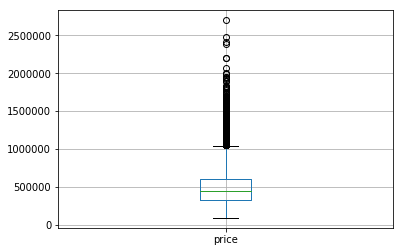

In [60]:
# First we run the boxplot to see a preliminary view of possible outliers.

# We shall ignore all categorical and irrelevant columns for outlier exercise. For example: we shall skip waterfront, view,
# condition, year_built, year_renovated, zipcode, lat, long, id and date 

# Let's start with column price
df4.boxplot(column='price')

In [61]:
# The boxplot shows a lot of outliers, which are bigger than 1000000
# Let's focus on these prices
PriceMoreThan1M = df4[df4['price']>1000000]
PriceMoreThan1M.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
25,6788200596,20141016T000000,1285000.0,4,3.5,3440,3800,3.0,0,0,3,9,3440,0,2014,0,98112,47.6408,-122.307
46,9197800010,20141017T000000,1460000.0,4,3.5,4200,14353,2.0,0,2,3,12,3640,560,1996,0,98040,47.5331,-122.217
49,7701960720,20141017T000000,1080000.0,4,2.5,4200,35267,2.0,0,0,3,11,4200,0,1990,0,98077,47.7108,-122.071
68,293760150,20141017T000000,1040000.0,4,3.5,4320,8490,2.0,0,0,3,10,3280,1040,2005,0,98029,47.5568,-122.029
82,1561600056,20141017T000000,1735000.0,4,3.5,4010,9654,2.0,0,0,3,10,4010,0,2007,0,98004,47.5891,-122.200


In [62]:
# The prices don't look abnormal, however let's check the more expensive properties
PriceMoreThan1M[PriceMoreThan1M['price']>2000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
1881,1725059316,20141120T000000,2.385000e+06,4,4.00,6330,13296,2.0,0,2,3,13,4900,1430,2000,0,98033,47.6488,-122.201
3784,824059305,20150108T000000,2.200000e+06,5,4.00,5840,11652,2.0,0,1,3,11,4410,1430,1988,0,98004,47.5835,-122.202
4200,2524069078,20150122T000000,2.700000e+06,4,4.00,7850,89651,2.0,0,0,3,12,7850,0,2006,0,98027,47.5406,-121.982
4464,2426039123,20150130T000000,2.415000e+06,5,4.75,7880,24250,2.0,0,2,3,13,7880,0,1996,0,98177,47.7334,-122.362
5752,9831200500,20150304T000000,2.479000e+06,5,3.75,6810,7500,2.5,0,0,3,13,6110,700,1922,0,98102,47.6285,-122.322
6128,3629940160,20150311T000000,2.200000e+06,5,4.50,5840,17168,2.0,0,0,3,12,4570,1270,2006,0,98029,47.5457,-121.991
8869,8943600430,20150423T000000,2.066243e+06,3,2.50,2283,3996,2.0,0,0,3,8,2283,0,2008,0,98031,47.4221,-122.192


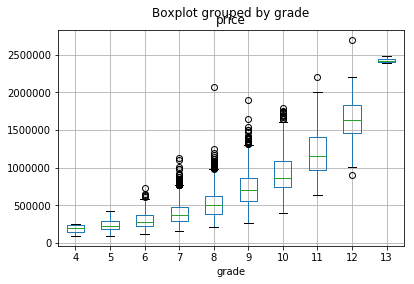

In [63]:
#Even the properties worth more than 2M, doesn't look abnormal from a contenxtual view
# One interesting observation though is that all these expensive houses are of higher grade

#Let's do the boxplots by grade to analyse the outliers
df4.boxplot(column='price', by='grade')

In [64]:
#Looking at the graded boxplot, we can minimise the outliers to analyse further
# We can see 5 major outliers in grade 8, 11 & 12
# 2 properties more than 2M property in Grade 8 & 11
# 1 Property more than 2.5M in grade 12
# 1 propoerty less than 1M in grade 12

#Let's look at these 5 rows of data
major_outliers = df4[((df4['price']>2000000) & (df4['grade'].isin({8,11,12})) | (df4['grade'].isin({12}) & (df4['price']<1000000)))]
major_outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
3784,824059305,20150108T000000,2.200000e+06,5,4.0,5840,11652,2.0,0,1,3,11,4410,1430,1988,0,98004,47.5835,-122.202
4200,2524069078,20150122T000000,2.700000e+06,4,4.0,7850,89651,2.0,0,0,3,12,7850,0,2006,0,98027,47.5406,-121.982
5197,2424059170,20150219T000000,9.000000e+05,5,6.0,7120,40806,2.0,0,4,3,12,5480,1640,2007,0,98006,47.5451,-122.114
6128,3629940160,20150311T000000,2.200000e+06,5,4.5,5840,17168,2.0,0,0,3,12,4570,1270,2006,0,98029,47.5457,-121.991
8869,8943600430,20150423T000000,2.066243e+06,3,2.5,2283,3996,2.0,0,0,3,8,2283,0,2008,0,98031,47.4221,-122.192


In [65]:
# The table above shows a 5th outlier that didn't show up in the boxplot
# This is a property worth 2.7M in grade 12

# From a contextual view, these data may be correct, however for further analysis of data, these outliers are best ignored
# So, we shall drop these outliers from our analysis data
# But before we drop these, let's look at the impact they have on average price  per grade
df4.groupby('grade')['price'].mean()

grade
4     1.869208e+05
5     2.339842e+05
6     2.967699e+05
7     3.984489e+05
8     5.237834e+05
9     7.233687e+05
10    9.320359e+05
11    1.214719e+06
12    1.638176e+06
13    2.426333e+06
Name: price, dtype: float64

In [66]:
df4 = df4.drop(major_outliers.index)
df4.groupby('grade')['price'].mean()

grade
4     1.869208e+05
5     2.339842e+05
6     2.967699e+05
7     3.984489e+05
8     5.232337e+05
9     7.233687e+05
10    9.320359e+05
11    1.207420e+06
12    1.597927e+06
13    2.426333e+06
Name: price, dtype: float64

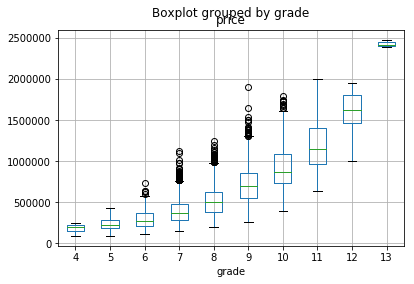

In [67]:
# All the three grades that were impacted with the outlier drop, showed a difference in mean price
# This difference is quite significant in grade 11 & 12

# Let's plot the boxplot again, now that we have removed themajor outliers
df4.boxplot(column='price', by='grade')

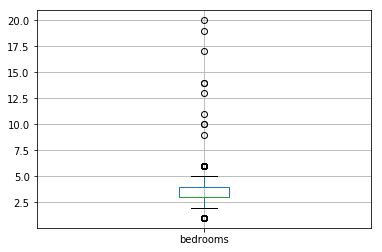

In [68]:
df4.boxplot(column='bedrooms')

In [69]:
# Let's see how many properties have more than 5 bedrooms
len(df4[df4['bedrooms']>5])

136

In [70]:
# 136 is quite a big number of properties and quite expected from a contextual perspective
# Properties up to 6 bedrooms are quite normal

# Let's see if properties more than 6 bedrooms also have high frequency
len(df4[df4['bedrooms']>6])

10

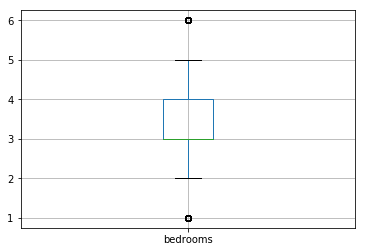

In [71]:
# As expeced, these are the real outliers
# So, let's drop them from the data
df4 = df4.drop(df4[df4['bedrooms']>6].index)

# and re-plot the boxplot
df4.boxplot(column='bedrooms')


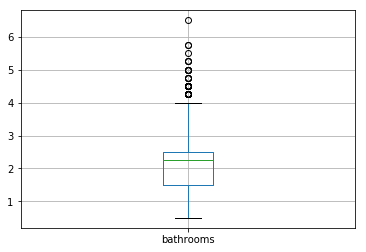

In [72]:
bp = df4.boxplot(column='bathrooms')
## It seems that some of the houses have more than 4 bathrooms, which is a bit unusual. 

In [73]:
# Lets see how many houses has more than 4 bathrooms
len(df4[df4['bathrooms'] > 4]) 

78

In [74]:
# Again, 78 properties is quite a large number - not worth the risk to drop all of them
# Let's see how many have more than 5 bathrooms
len(df4[df4['bathrooms'] > 5])

7

In [75]:
# As expeced, these are the real outliers
# So, let's drop them from the data

# But before that let's see these 7 rows of data
df4[df4['bathrooms'] > 5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
1623,7237500590,20141117T000000,1320000.0,4,5.25,6110,10369,2.0,0,0,3,11,6110,0,2005,0,98059,47.5285,-122.135
1719,9297300740,20141118T000000,643500.0,6,5.25,3600,3960,2.0,0,0,3,7,2400,1200,1971,0,98126,47.5656,-122.372
2749,98000950,20141210T000000,1060000.0,4,5.25,4140,14757,2.0,0,2,3,11,4140,0,2005,0,98075,47.5871,-121.969
4468,1630700380,20150130T000000,1920000.0,5,5.75,7730,230868,2.0,0,0,3,12,6660,1070,2004,0,98077,47.7615,-122.084
4726,2626069030,20150209T000000,1940000.0,4,5.75,7220,223462,2.0,0,4,3,12,6220,1000,2000,0,98053,47.7097,-122.013
7196,424069279,20150328T000000,1180000.0,6,6.50,6260,10955,2.0,0,0,3,11,4840,1420,2007,0,98075,47.5947,-122.039
8313,1125079111,20150415T000000,1600000.0,4,5.50,6530,871200,2.0,0,2,3,11,6530,0,2008,0,98014,47.6640,-121.878


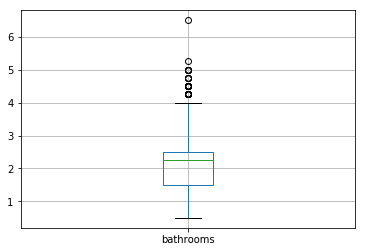

In [76]:
# Looking at the data, it makes more sense to drop the rows that have more bathrooms than bedrooms
bathroom_outliers = df4[(df4['bathrooms']>5)&(df4['bedrooms']<=5)]

df4 = df4.drop(bathroom_outliers.index)

#and re-plot the boxplot
df4.boxplot(column='bathrooms')

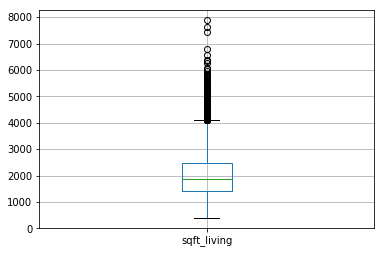

In [77]:
bp = df4.boxplot(column='sqft_living')

In [78]:
# First let's look at the # of rows having more than 4000sqft
len(df4[df4['sqft_living']>4000])

264

In [79]:
#264 rows of data is too large to be dropped
#Let's instead find out which ones are more than 7000sqft
df4[df4['sqft_living']>7000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
2135,3459900230,20141125T000000,1680000.0,4,3.75,7620,29536,2.0,0,3,3,11,5980,1640,2005,0,98006,47.5571,-122.140
3853,8835800350,20150112T000000,1950000.0,4,3.25,7420,167869,2.0,0,3,3,12,7420,0,2002,0,98045,47.4548,-121.764
4464,2426039123,20150130T000000,2415000.0,5,4.75,7880,24250,2.0,0,2,3,13,7880,0,1996,0,98177,47.7334,-122.362


In [80]:
#By observing the data, we can conclude not to drop them, as they look like large normal properties
#So, we shall keep all these visible outliers

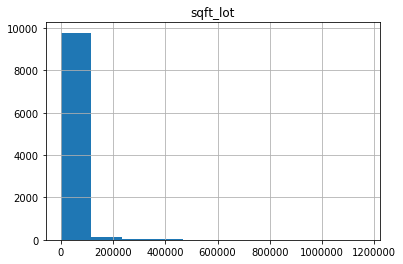

In [81]:
bp = df4.hist(column='sqft_lot')

In [82]:
# Let's look at properties more than 400000sqft
len(df4[df4['sqft_lot']>=600000])

6

In [83]:
df4[df4['sqft_lot']>=600000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
3628,2724079090,20150105T000000,1650000.0,4,3.25,3920,881654,3.0,0,3,3,11,3920,0,2002,0,98024,47.5385,-121.896
3725,225079036,20150107T000000,937500.0,4,4.00,5545,871200,2.0,0,0,3,11,3605,1940,2003,0,98014,47.6760,-121.882
4055,2323089009,20150119T000000,855000.0,4,3.50,4030,1024068,2.0,0,0,3,10,4030,0,2006,0,98045,47.4619,-121.744
7157,522079022,20150327T000000,700000.0,3,2.50,2530,623779,1.0,0,0,4,8,2530,0,1980,0,98038,47.4188,-121.949
7656,619079096,20150406T000000,750000.0,3,2.50,2350,715690,1.5,0,0,4,9,2350,0,1979,0,98022,47.1622,-121.971
9566,3326079016,20150504T000000,190000.0,2,1.00,710,1164794,1.0,0,0,2,5,710,0,1915,0,98014,47.6888,-121.909


In [84]:
# Looking at the table above, it looks like these properties might be more like farmhouses with acres of lands
# Although they look like outliers, it's probably not so useful dropping these data

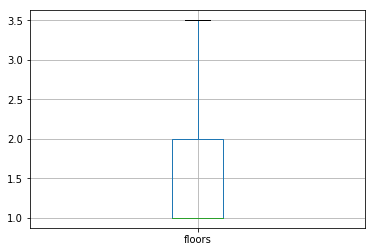

In [85]:
bp = df4.boxplot(column='floors')
## Its seems that floors columns do not have any outliers

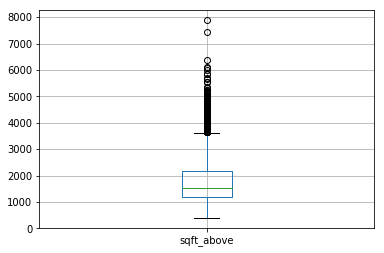

In [86]:
bp = df4.boxplot(column='sqft_above')

In [87]:
# Let's analyse the outlier data to see if we need to drop them
df4[df4['sqft_above']>=7000]
#Looking at the data, they don't look like outliers to be dropped

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
3853,8835800350,20150112T000000,1950000.0,4,3.25,7420,167869,2.0,0,3,3,12,7420,0,2002,0,98045,47.4548,-121.764
4464,2426039123,20150130T000000,2415000.0,5,4.75,7880,24250,2.0,0,2,3,13,7880,0,1996,0,98177,47.7334,-122.362


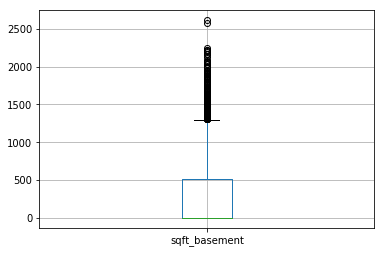

In [88]:
bp = df4.boxplot(column='sqft_basement')

In [89]:
# Let's analyse the outlier data to see if we need to drop them
df4[df4['sqft_basement']>=2500]
#Looking at the data, they don't look like outliers to be dropped

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
793,4139420640,20141030T000000,1785000.0,4,3.5,5490,14300,1.0,0,4,3,12,2910,2580,1996,0,98006,47.5511,-122.114
1584,8924600020,20141114T000000,1535000.0,4,4.5,5770,10050,1.0,0,3,5,9,3160,2610,1949,0,98115,47.6770,-122.275


In [90]:
#Now that we have cleand up all the outliers, let's put them in to output CSV
df4.to_csv('dataset4_solution.csv', index=False)